<a href="https://colab.research.google.com/github/ddodds42/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/DAVID_DODDS_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

In [0]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1
max_len = 80
batches = 32

In [0]:
X_train0 = sequence.pad_sequences(X_train, maxlen=max_len)
X_test0 = sequence.pad_sequences(X_test, maxlen=max_len)
X_train0.shape, X_test0.shape

((8982, 80), (2246, 80))

In [0]:
X_train0[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,
         24,    4, 1222, 2771,    7,  227,  236,   40,   85,  944,   10,
        531,  176,    8,    4,  176, 1613,   24, 1662,  297, 5157,    6,
         10,  103,    5,  231,  215,    8,    7, 2889,    6,   10, 1202,
         69,    4, 1222,  329, 2771,   24,  944,   23,  944, 1662,   40,
       2509, 1592,  907,   69,    4,  113,  997,  762, 2539,    7,  227,
        236,   17,   12], dtype=int32)

In [0]:
len(X_train0)

8982

In [0]:
len(y_train)

8982

In [0]:
len(set(y_train))

46

In [0]:
len(set(y_test))

46

In [0]:
model = Sequential()

model.add(Embedding(max_features, 64))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(
    loss='sparse_categorical_crossentropy', optimizer='adam',
    metrics=['accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1982720   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 46)                2990      
Total params: 2,018,734
Trainable params: 2,018,734
Non-trainable params: 0
_________________________________________________________________


In [0]:
presto = model.fit(
    X_train0, y_train, batch_size=batches, epochs=8,
    validation_data=(X_test0, y_test)
)

Epoch 1/8
281/281 [==============================] - 82s 293ms/step - loss: 2.4439 - accuracy: 0.3745 - val_loss: 2.1091 - val_accuracy: 0.4497
Epoch 2/8
281/281 [==============================] - 82s 292ms/step - loss: 1.9721 - accuracy: 0.4875 - val_loss: 1.7595 - val_accuracy: 0.5378
Epoch 3/8
281/281 [==============================] - 83s 294ms/step - loss: 1.6538 - accuracy: 0.5710 - val_loss: 1.6108 - val_accuracy: 0.5868
Epoch 4/8
281/281 [==============================] - 83s 297ms/step - loss: 1.4301 - accuracy: 0.6237 - val_loss: 1.5250 - val_accuracy: 0.6011
Epoch 5/8
281/281 [==============================] - 82s 293ms/step - loss: 1.2215 - accuracy: 0.6760 - val_loss: 1.4702 - val_accuracy: 0.6327
Epoch 6/8
281/281 [==============================] - 82s 292ms/step - loss: 1.0345 - accuracy: 0.7348 - val_loss: 1.4448 - val_accuracy: 0.6647
Epoch 7/8
281/281 [==============================] - 82s 294ms/step - loss: 0.8703 - accuracy: 0.7806 - val_loss: 1.4725 - val_accuracy:

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*
# The 'pad_sequences' method reshapes the input arrays to the same length, in this case specified to 80, by either trimming the latter values that are beyond index position 80 for that observation, or adding 0's to the beginning until each observation is an array of length 80. This allows the input arrays to be of a uniform length for the input layer of the net.



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
# An RNN is the most basic form of Sequential / Recursive Neural Network types, but it does not remember inputs and outputs from previous sequence positions of the sequential data, as LSTM's do, and RNN's in their most vanilla form are more sensitive to the vanishing gradient descent problem, making it harder to train the earlier layers of an RNN than in an LSTM specifically.


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
# RNN's and LSTM's are well suited to any type of sequential data because the chronology of data input and learning from the sequentially 'earlier' data points matters. Their recursive structure preserves the importance of these sequence orders. Such sequential data includes year-over-year government failure events, as I worked with in Unit 2; or maybe a health tracker app in which data from today is not effected by data from tomorrow, but data from yesterday and before; or even tracking a contagion in epidemiology, as infection is chronological.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from skimage.io import imread_collection
from skimage.transform import resize #This might be a helpful function for you

path = '/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/'
images = imread_collection(path + '*.jpg')
# images = imread_collection('./frog_images/*.jpg')

In [75]:
print(type(images))
print(type(images[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(images[0].shape)
print(images[1].shape)

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - Check for other things such as fish.

In [84]:
import numpy as np
 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API
 
resnet = ResNet50(weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


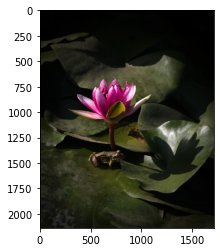

In [88]:
import matplotlib.pyplot as plt
photo = images[0]
plt.imshow(photo)

In [0]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

In [0]:
img0_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/cristiane-teston-bcnfJvEYm1Y-unsplash.jpg')
img1_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/drew-brown-VBvoy5gofWg-unsplash.jpg')
img2_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/ed-van-duijn-S1zA6AR50X8-unsplash.jpg')
img3_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/elizabeth-explores-JZybccsrB-0-unsplash.jpg')
img4_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/jacky-watt-92W5jPbOj48-unsplash.jpg')
img5_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/jared-evans-VgRnolD7OIw-unsplash.jpg')
img6_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/joel-henry-Rcvf6-n1gc8-unsplash.jpg')
img7_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/marcus-neto-fH_DOdTt-pA-unsplash.jpg')
img8_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/matthew-kosloski-sYkr-M78H6w-unsplash.jpg')
img9_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/mche-lee-j-P8z4EOgyQ-unsplash.jpg')
img10_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg')
img11_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/saturday_sun-_q37Ca0Ll4o-unsplash.jpg')
img12_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg')
img13_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/yanna-zissiadou-SV-aMgliWNs-unsplash.jpg')
img14_prepped = process_img_path('/content/drive/My Drive/Colab Notebooks/U4 ML Engineering/frog_images/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg')


In [0]:
prepped_imgs = [img0_prepped, img1_prepped, img2_prepped, img3_prepped,
                img4_prepped, img5_prepped, img6_prepped, img7_prepped,
                img8_prepped, img9_prepped, img10_prepped, img11_prepped,
                img12_prepped, img13_prepped, img14_prepped]

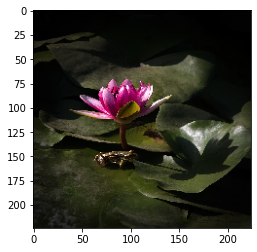

In [137]:
plt.imshow(img0_prepped)

In [0]:
def has_frog(img):
  pic = plt.imshow(img)
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  x=preprocess_input(x)
  model = ResNet50(weights='imagenet') # , include_top=False)
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return pic, print(results)


[('n07718747', 'artichoke', 0.30643502), ('n02281787', 'lycaenid', 0.23586154), ('n07730033', 'cardoon', 0.18358302)]


(<matplotlib.image.AxesImage at 0x7f153c9087b8>, None)

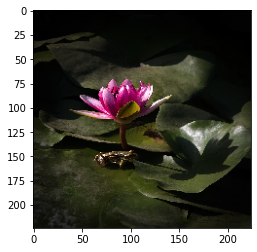

In [148]:
has_frog(img0_prepped)

[('n07718747', 'artichoke', 0.30643502), ('n02281787', 'lycaenid', 0.23586154), ('n07730033', 'cardoon', 0.18358302)]
(<matplotlib.image.AxesImage object at 0x7f15326ad240>, None)
[('n01641577', 'bullfrog', 0.9906962), ('n01667778', 'terrapin', 0.0057199243), ('n02655020', 'puffer', 0.0005393227)]
(<matplotlib.image.AxesImage object at 0x7f1529582eb8>, None)
[('n02281787', 'lycaenid', 0.2759694), ('n01641577', 'bullfrog', 0.07020149), ('n03314780', 'face_powder', 0.038609847)]
(<matplotlib.image.AxesImage object at 0x7f15282097b8>, None)
[('n04259630', 'sombrero', 0.48067796), ('n02877765', 'bottlecap', 0.08324397), ('n04409515', 'tennis_ball', 0.06374447)]
(<matplotlib.image.AxesImage object at 0x7f1526e88f98>, None)
[('n03991062', 'pot', 0.59937125), ('n11939491', 'daisy', 0.11405529), ('n02840245', 'binder', 0.05157822)]
(<matplotlib.image.AxesImage object at 0x7f1525a68080>, None)
[('n01644373', 'tree_frog', 0.5484311), ('n01641577', 'bullfrog', 0.30995607), ('n01644900', 'tailed_f

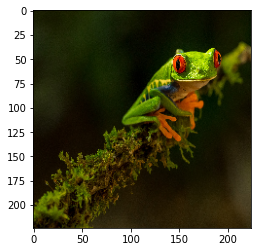

In [152]:
for img in prepped_imgs:
  print(has_frog(img))

# Ugh sorry about the rush job

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
# It could simply be used for file compression of a novel, not-yet-well-defined file type. Jpegs, gifs, etc already have well defined compression algorhithms, but we may not always be working with such file types. But we still need to be able to send them and reverse-query them, much like a reverse-image search would use an autoencoder to compress various images to search them more rapidly.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
# I feel like I have a strength for verifying whether code worked as inteneded, whether it's a model, analytics, or data processing. Sometimes the code fails silently, and we need to run checks that the output that the interpreter just internalized meets the parameters we intended. Much like we'd check a multiplication problem by dividing. I feel like I have a knack for that.

- What area of Data Science would you most like to learn more about, and why?
# I want to learn more about mechine learning, how that can be taught to many people at a young age, and how instances of ML like algorhithmic trading can onboard more people into high return ownership of liquid capital. I feel that a synthesis of these applcations of ML could help drastically augment the obsolecent destructiveness of automation.
# And furthermore I'd like to investigate not only how to prevent automated poverty, but also how to prevent automated extinction. Not only do I want us to be able to harness the computerized oxen, I want us to not be horned and hooved by it. I'm interested in defining value alignment, algorithmic accountability, and using AI to hedge global catastrophic risks rather than amplifying them.

- Where do you think Data Science will be in 5 years?
# I'm a bit pessimistic about the recovery of the general economy that most people think will just remain after the quarrantines are lifted. I think the scare that this brought to businesses of all sizes will accelerate investment and hiring for specifically automation engineers, because all of a sudden businesses want any and every way to continue operations during a disease outbreak. Computer-genic automation has been constant since the 1960's, but I think this will only accelerate automation efforts. The American public thought they were being lectured to when they were warned about automation in 2016, and many voted with an emotional reaction to that lecturing rather than ratioanally. I think the automation will feel less hypothitical by 2025, it will be a much more obvious sour taste in everyone's mouth by then. Anyway, where I'm going with this... is that of all of the subtypes of data science job titles you see out there, expect a sharp and motivated uptick in positions for "automation engineers" or other closely related titles.

- What are the threats posed by AI to our society?
# Any type of extinction you could imagine. How about we start with that? Leathal Autonomous Weapons Systems don't even have to end up in the hands of "bad guys". The so called "good guys" that created them could take a totalitarian backslide, and there's a recipe for a future of slavery and genocide with really shiny gadgets in the mix. So many ways it could go wrong. For me, the root of the danger is the same paradigm that preceded world war 1, the same paradigm which also lead to the (ONGOING) nuclear cold-war. That paradigm is the MOMENTUM that these technologies have all their own. The apes that created them have every incentive to acquire them before the "bad guys" do, and once they exist in a functional form, they tend to proliferate and get abused.

- How do you think we can counteract those threats? 
# Game theory and studies of information assymetry might have some interesting applications at the very algorithmic level of ML for building structures of accountability, adversarial accountability, value alignment, and purging of perverse incentive / perverse optimization.

- Do you think achieving General Artifical Intelligence is ever possible?
# Yes. It's just a matter of getting silicon to do what carbon-oxygen-nitrogen complices in our brains have been doing for hundreds of thousands of years. When I put it that way, does it not seem inevitable? Evolution did it without even a desire to attain it.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [153]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")